Dependencies

In [18]:
%pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [19]:
%pip install seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


Preprocessing Dataset

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('E:\Programms\ML Project\medicine_recommendation_system\datasets\Training.csv')


In [4]:
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
dataset.shape

(4920, 133)

In [5]:
dataset.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64



```
# This is formatted as code
```

## Train-test Split

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
X = dataset.drop('prognosis',axis=1)
y = dataset['prognosis']

In [27]:
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y.head()

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: prognosis, dtype: object

In [45]:
y.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [7]:
#Encoding Prognosis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

In [8]:
Y

array([15, 15, 15, ..., 38, 35, 27])

### MAJOR Changes-----------

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Step 1: Separate Features and Target Variable
X = dataset.drop('prognosis', axis=1)  # Features (symptoms)
y = dataset['prognosis']  # Target Variable (disease)

# Step 2: Encode Categorical Target Variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply PCA
# pca = PCA(n_components=0.5)  # Keep 95% of the variance
# X_pca = pca.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ---------------------PCA alternative-------------------
from sklearn.decomposition import TruncatedSVD

# Assuming X_train is your binary input training data
# Initialize TruncatedSVD with desired number of components
n_components = 10  # Adjust as needed
svd = TruncatedSVD(n_components=n_components)

# Fit TruncatedSVD on the training data
X_train = svd.fit_transform(X_train)

# Transform the test data
X_test = svd.transform(X_test)

# --------------------------------------



In [31]:
import pickle

# Save the fitted TruncatedSVD instance
with open('svd_model.pkl', 'wb') as f:
    pickle.dump(svd, f)


In [7]:
print(type(y_train))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pickle

# Train and save the SVC model
svc_model = SVC(kernel='linear', C=0.5)
svc_model.fit(X_train, y_train)
with open('svc_model.pkl', 'wb') as f:
    pickle.dump(svc_model, f)

# Train and save the RandomForest model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Train and save the GradientBoosting model
gb_model = GradientBoostingClassifier(n_estimators=10, random_state=42)
gb_model.fit(X_train, y_train)
with open('gb_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

# Train and save the KNeighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

# Train and save the DecisionTree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
with open('dt_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

# Train and save the AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_model.fit(X_train, y_train)
with open('ada_model.pkl', 'wb') as f:
    pickle.dump(ada_model, f)

# Train and save the ExtraTrees model
et_model = ExtraTreesClassifier(n_estimators=10, random_state=42)
et_model.fit(X_train, y_train)
with open('et_model.pkl', 'wb') as f:
    pickle.dump(et_model, f)

# Train and save the LogisticRegression model
lr_model = LogisticRegression(max_iter=10, random_state=42)
lr_model.fit(X_train, y_train)
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

# Train and save the RBF SVM model
svc_rbf_model = SVC(kernel='rbf', C=0.6)
svc_rbf_model.fit(X_train, y_train)
with open('svc_rbf_model.pkl', 'wb') as f:
    pickle.dump(svc_rbf_model, f)


e:\Programms\ML Project\medicine_recommendation_system\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
e:\Programms\ML Project\medicine_recommendation_system\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:  svc
Accuracy: 0.9695
Precision: 0.9750
Recall: 0.9688
F1 Score: 0.9703


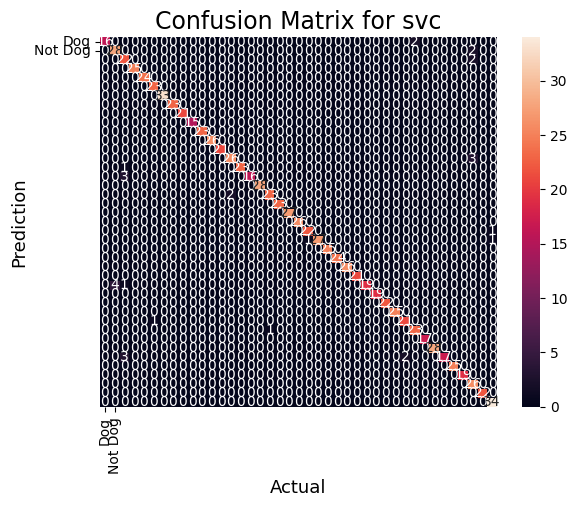


Model:  rf
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


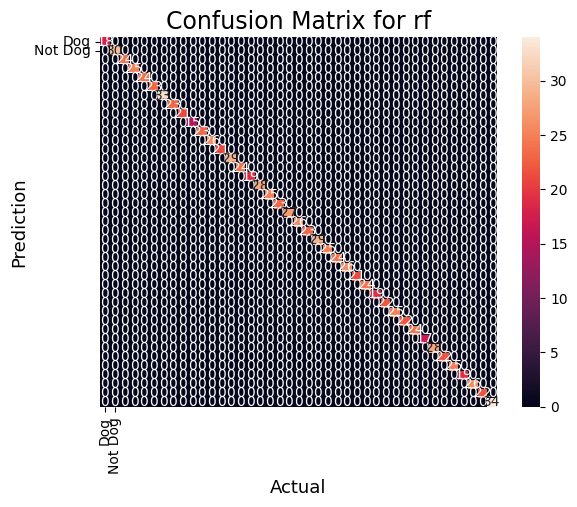


Model:  gb
Accuracy: 0.9909
Precision: 0.9899
Recall: 0.9913
F1 Score: 0.9899


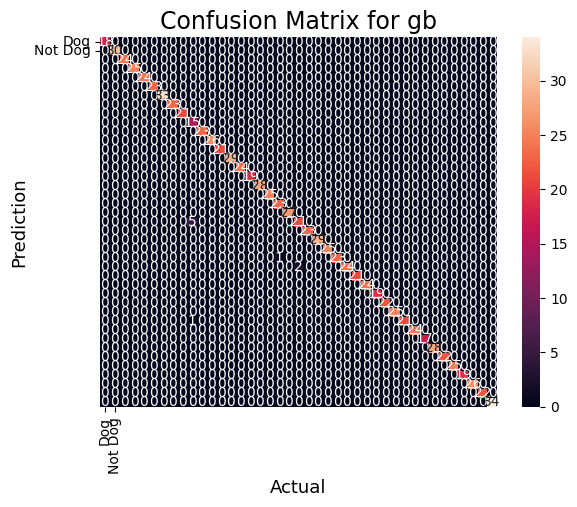


Model:  knn
Accuracy: 0.9919
Precision: 0.9935
Recall: 0.9931
F1 Score: 0.9928


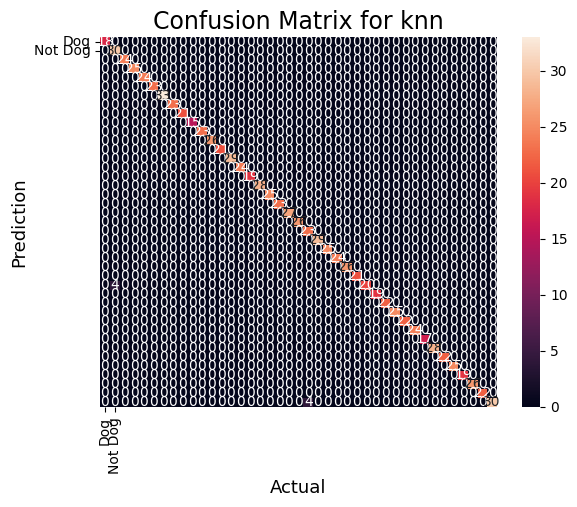


Model:  dt
Accuracy: 0.9817
Precision: 0.9890
Recall: 0.9824
F1 Score: 0.9792


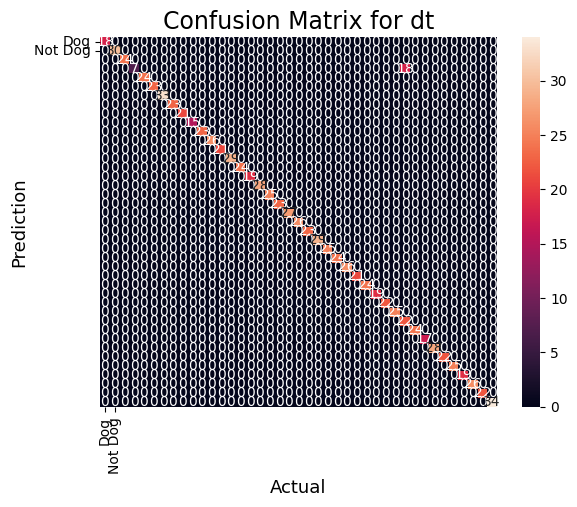


Model:  ada
Accuracy: 0.0559
Precision: 0.0370
Recall: 0.0732
F1 Score: 0.0414


e:\Programms\ML Project\medicine_recommendation_system\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


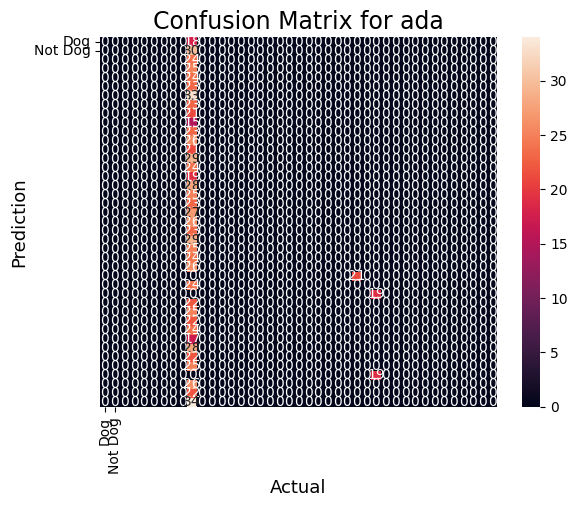


Model:  et
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


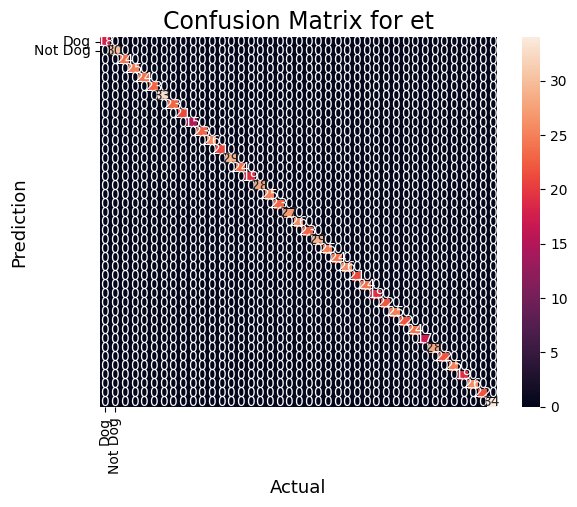


Model:  lr
Accuracy: 0.9685
Precision: 0.9748
Recall: 0.9651
F1 Score: 0.9645


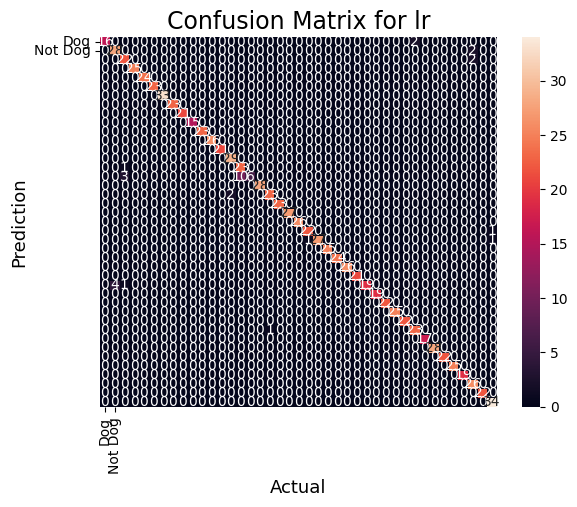

In [17]:
import pickle
import csv
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
# Load the saved models
model_files = ['svc_model.pkl', 'rf_model.pkl', 'gb_model.pkl', 'knn_model.pkl',
               'dt_model.pkl', 'ada_model.pkl', 'et_model.pkl', 'lr_model.pkl',
               'svc_rbf_model.pkl']
model_metrics = []

models = {}
for model_file in model_files:
    with open(model_file, 'rb') as f:
        models[model_file.split('_')[0]] = pickle.load(f)

# Load the test data if not already loaded
# Assuming X_test and y_test are loaded

# Evaluate each model
for model_name, model in models.items():
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
   # Print metrics with fixed decimal places
    print(f"Model:  {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")


    cm = confusion_matrix(y_test, predictions)

    # Plot confusion matrix
    sns.heatmap(cm, 
                annot=True,
                fmt='g', 
                # cmap=plt.cm.Blues,
                xticklabels=['Dog', 'Not Dog'],
                yticklabels=['Dog', 'Not Dog'])
    plt.ylabel('Prediction', fontsize=13)
    plt.xlabel('Actual', fontsize=13)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=17)
    plt.show()

    # getting csv file
    model_metrics.append([model_name, accuracy, precision, recall, f1])
    with open('model_metrics.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
        writer.writerows(model_metrics)

    
    print()


### Confusion Matrices

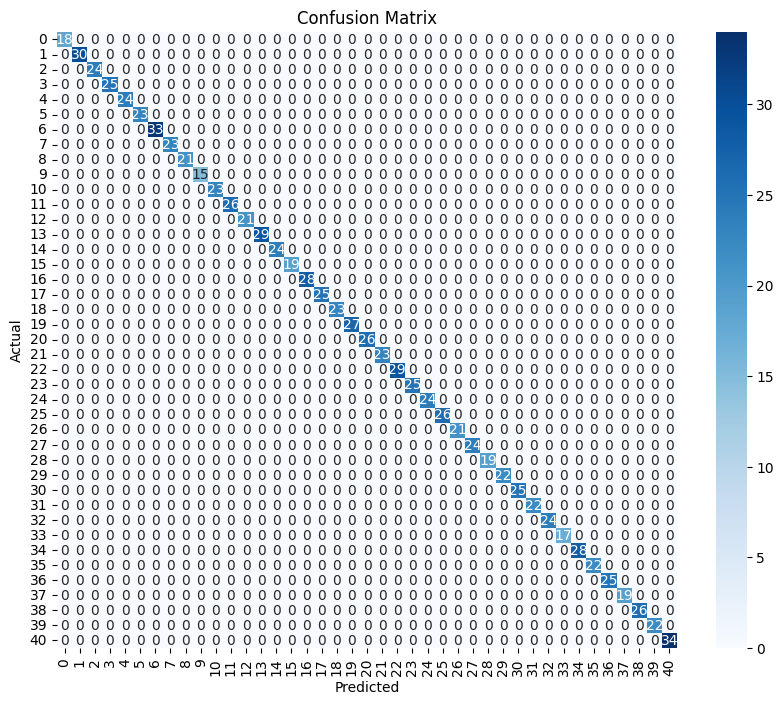

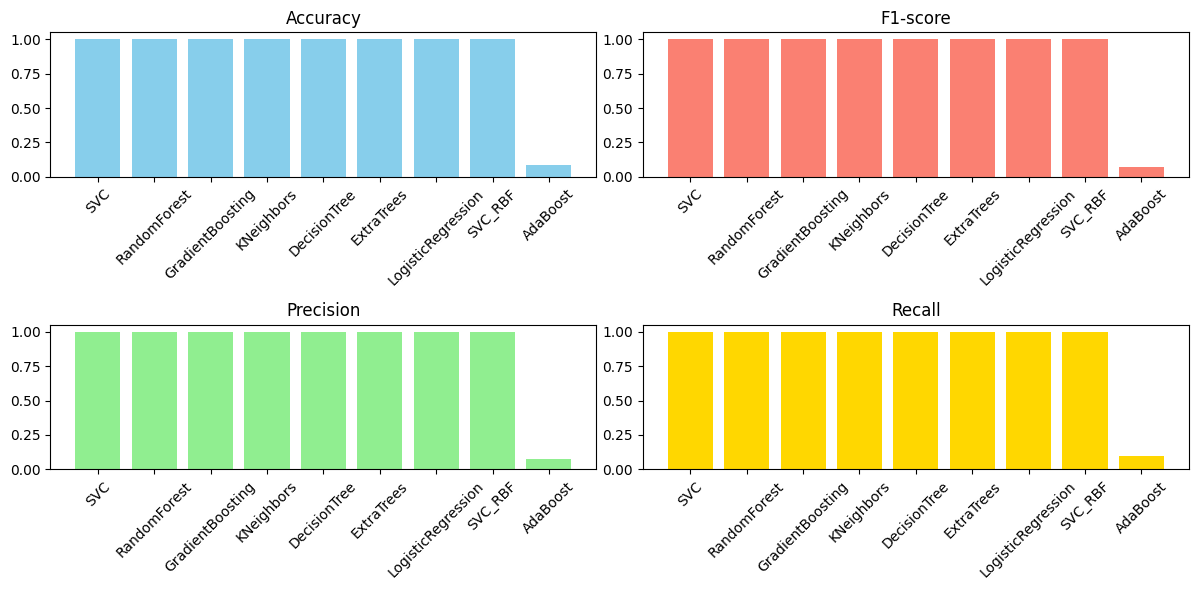

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for a specific model (replace 'model' and 'X_test' with your model and test set)
plot_confusion_matrix(y_test, predictions, labels=model.classes_)

# Compare evaluation metrics among various models
models = ['SVC', 'RandomForest', 'GradientBoosting', 'KNeighbors', 'DecisionTree', 'ExtraTrees', 'LogisticRegression', 'SVC_RBF', 'AdaBoost']
accuracies = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.089]
f1_scores = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.074]
precisions = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.074]
recalls = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.098]

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(models, f1_scores, color='salmon')
plt.title('F1-score')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.bar(models, precisions, color='lightgreen')
plt.title('Precision')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(models, recalls, color='gold')
plt.title('Recall')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


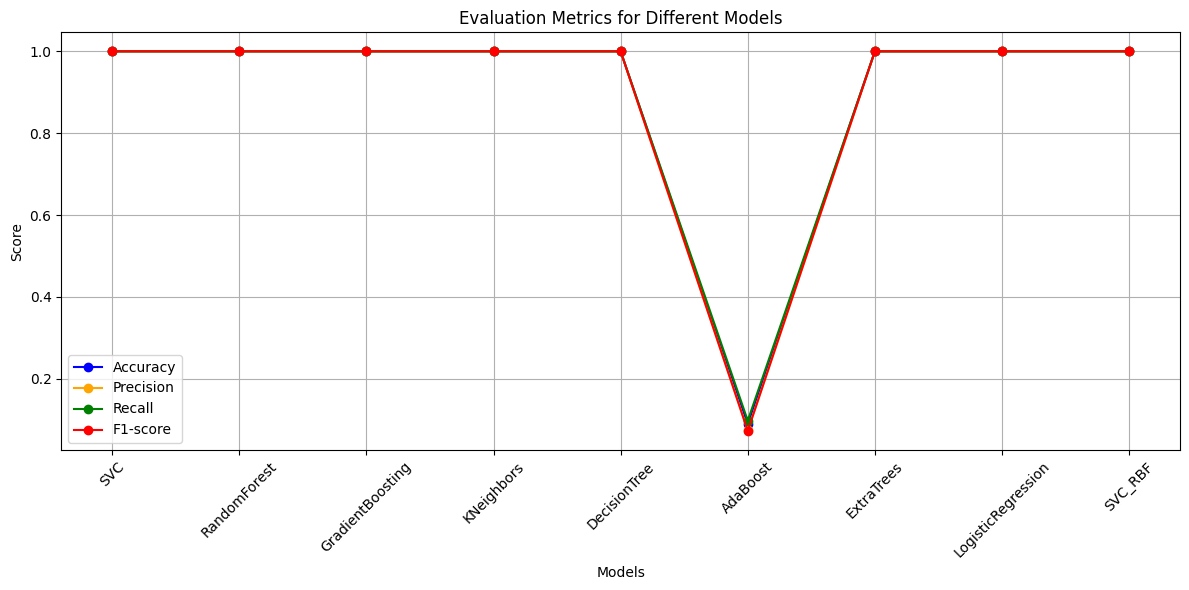

In [37]:
import matplotlib.pyplot as plt

# Define data
models = ['SVC', 'RandomForest', 'GradientBoosting', 'KNeighbors', 'DecisionTree', 'AdaBoost', 'ExtraTrees', 'LogisticRegression', 'SVC_RBF']
accuracy = [1.0, 1.0, 1.0, 1.0, 1.0, 0.089, 1.0, 1.0, 1.0]
precision = [1.0, 1.0, 1.0, 1.0, 1.0, 0.074, 1.0, 1.0, 1.0]
recall = [1.0, 1.0, 1.0, 1.0, 1.0, 0.098, 1.0, 1.0, 1.0]
f1_score = [1.0, 1.0, 1.0, 1.0, 1.0, 0.073, 1.0, 1.0, 1.0]

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(models, accuracy, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.plot(models, precision, marker='o', linestyle='-', color='orange', label='Precision')
plt.plot(models, recall, marker='o', linestyle='-', color='green', label='Recall')
plt.plot(models, f1_score, marker='o', linestyle='-', color='red', label='F1-score')

plt.title('Evaluation Metrics for Different Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Testing

In [ ]:
# import pickle
# import numpy as np

# # Load the pickled TruncatedSVD model
# with open('svd_model.pkl', 'rb') as f:
#     svd_model = pickle.load(f)

# # Load the pickled ML classifier (e.g., Random Forest, SVC)
# with open('rf_model.pkl', 'rb') as f:
#     ml_classifier = pickle.load(f)

# # Assuming 'X_test' is your test dataset and 'y_test' is the corresponding labels
# # Preprocess input using TruncatedSVD
# def preprocess_input(input_data):
#     input_data_transformed = svd_model.transform(input_data)
#     return input_data_transformed

# # Test a single input observation
# input_observation_index = 20  # Change this index according to your dataset
# input_observation = X_test[input_observation_index].reshape(1, -1)

# # Preprocess input using TruncatedSVD
# input_observation_transformed = preprocess_input(input_observation)

# # Predict the output label
# predicted_label = ml_classifier.predict(input_observation_transformed)

# # Print the predicted label
# print("Predicted Label:", predicted_label[0])
# print("Actual label:" , y_test[input_observation_index])


In [44]:
# Assuming X_test contains your test dataset
# Extract the relevant features from X_test for the input observation
input_observation_index = 20
input_observation = X_test[[input_observation_index]]

# Preprocess the input observation (e.g., scaling, encoding categorical variables)
# Ensure that the preprocessing steps are consistent with the training data
# You may need to perform the same preprocessing steps that were applied to the training data
# For example, if you used StandardScaler for scaling, apply it to the input observation as well

# Now, predict the disease for the preprocessed input observation
predicted_disease = model.predict(input_observation)

# Print the predicted disease
print("Predicted Disease:", predicted_disease[0])


Predicted Disease: 6


## Training on Models

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Apply PCA
pca = PCA(n_components=0.6)  # Keep 95% of the variance
X_pca = pca.fit_transform(X)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)


In [ ]:
# Dictionary to store models
models = {
    'SVC': SVC(kernel='linear', C=1),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVC_RBF': SVC(kernel='rbf', C=1)
}

SVC Accuracy: 0.9806910569105691
SVC Confusion Matrix:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 28,  0, ...,  2,  0,  0],
 [ 0,  0, 22, ...,  2,  0,  0],
 ...,
 [ 0,  0,  0, ..., 26,  0,  0],
 [ 0,  0,  0, ...,  0, 22,  0],
 [ 0,  0,  0, ...,  0,  0, 34]]


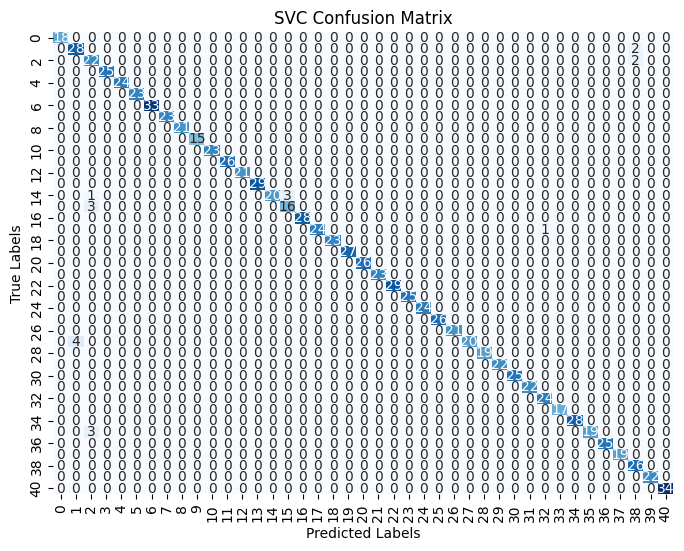



RandomForest Accuracy: 1.0
RandomForest Confusion Matrix:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 26,  0,  0],
 [ 0,  0,  0, ...,  0, 22,  0],
 [ 0,  0,  0, ...,  0,  0, 34]]


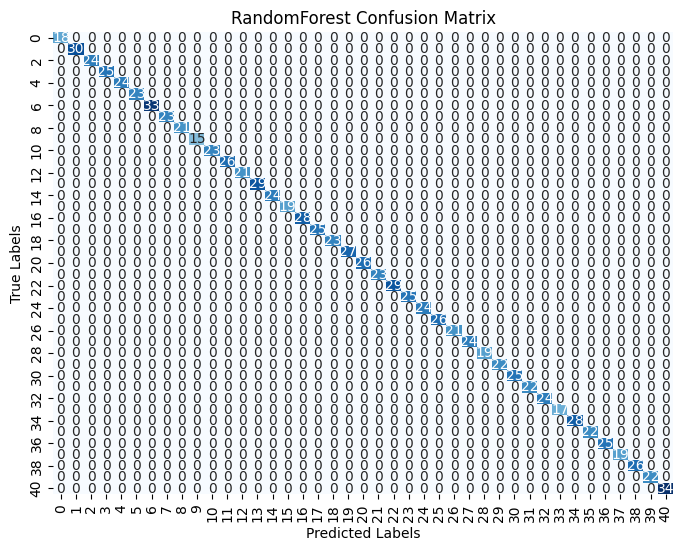



GradientBoosting Accuracy: 1.0
GradientBoosting Confusion Matrix:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 26,  0,  0],
 [ 0,  0,  0, ...,  0, 22,  0],
 [ 0,  0,  0, ...,  0,  0, 34]]


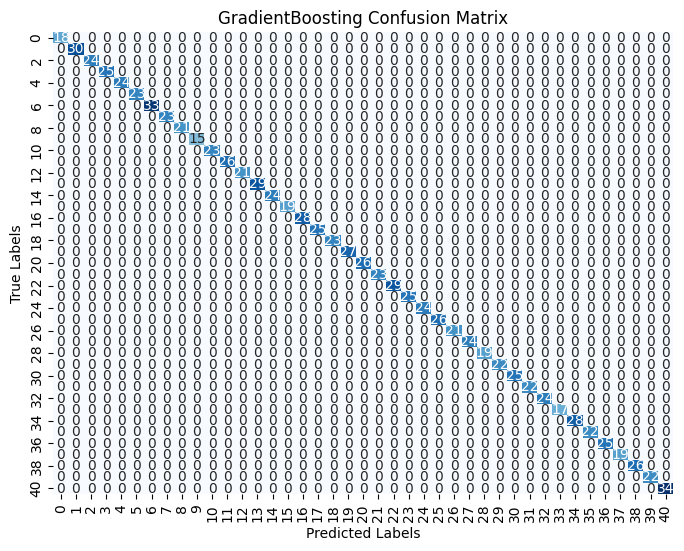



KNeighbors Accuracy: 0.9959349593495935
KNeighbors Confusion Matrix:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 26,  0,  0],
 [ 0,  0,  0, ...,  0, 22,  0],
 [ 0,  0,  0, ...,  0,  0, 34]]


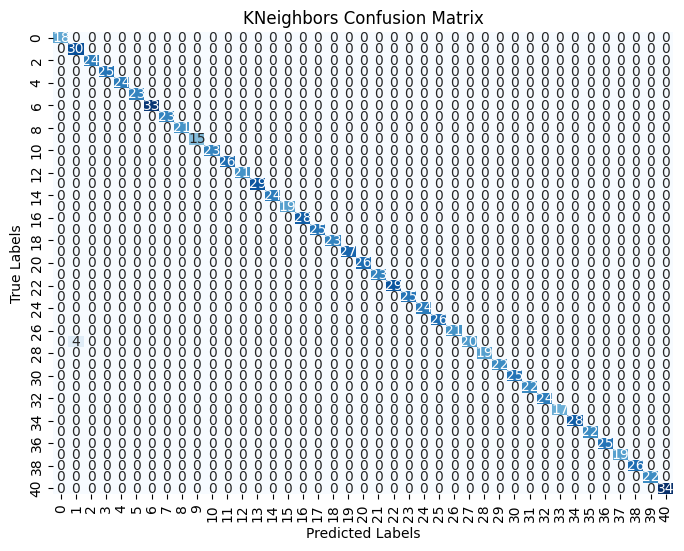



DecisionTree Accuracy: 1.0
DecisionTree Confusion Matrix:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 26,  0,  0],
 [ 0,  0,  0, ...,  0, 22,  0],
 [ 0,  0,  0, ...,  0,  0, 34]]


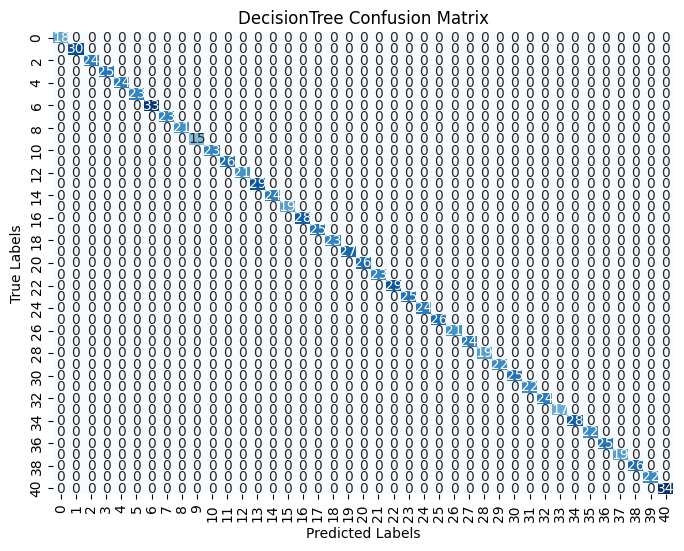

e:\Programms\ML Project\medicine_recommendation_system\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.08638211382113821
AdaBoost Confusion Matrix:
[[0, 0, 0, ..., 0, 0, 0],
 [0, 0, 0, ..., 0, 0, 0],
 [0, 0, 0, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 0, 0, 0],
 [0, 0, 0, ..., 0, 0, 0],
 [0, 0, 0, ..., 0, 0, 0]]


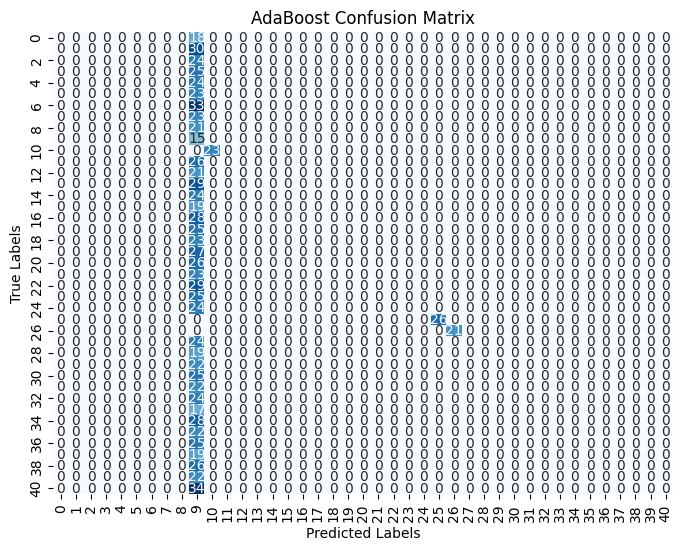



ExtraTrees Accuracy: 1.0
ExtraTrees Confusion Matrix:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 26,  0,  0],
 [ 0,  0,  0, ...,  0, 22,  0],
 [ 0,  0,  0, ...,  0,  0, 34]]


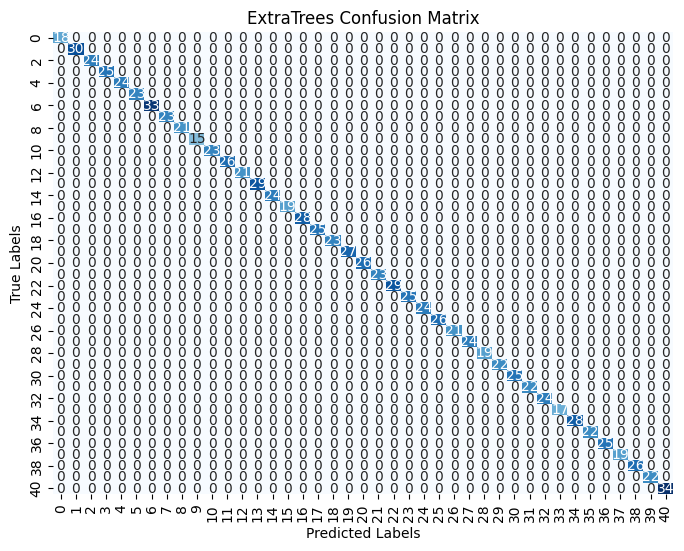



LogisticRegression Accuracy: 0.9766260162601627
LogisticRegression Confusion Matrix:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 28,  0, ...,  2,  0,  0],
 [ 0,  0, 22, ...,  2,  0,  0],
 ...,
 [ 0,  0,  0, ..., 26,  0,  0],
 [ 0,  0,  0, ...,  0, 22,  0],
 [ 0,  0,  0, ...,  0,  0, 34]]


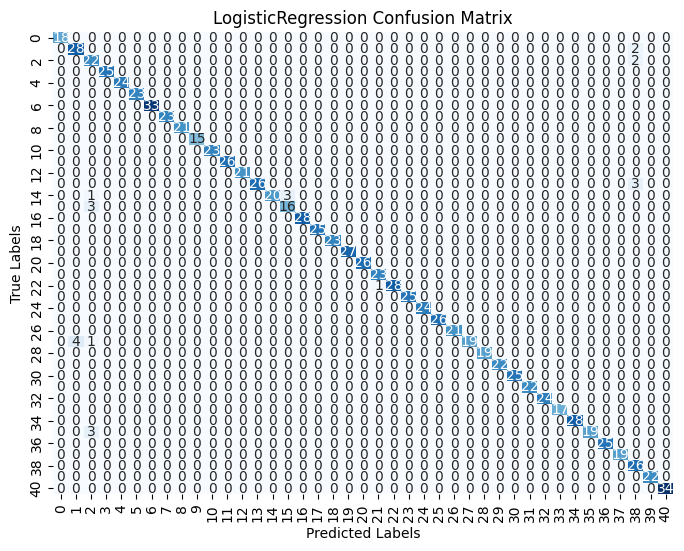



SVC_RBF Accuracy: 0.9766260162601627
SVC_RBF Confusion Matrix:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 28,  0, ...,  2,  0,  0],
 [ 0,  0, 22, ...,  2,  0,  0],
 ...,
 [ 0,  0,  0, ..., 26,  0,  0],
 [ 0,  0,  0, ...,  0, 22,  0],
 [ 0,  0,  0, ...,  0,  0, 34]]


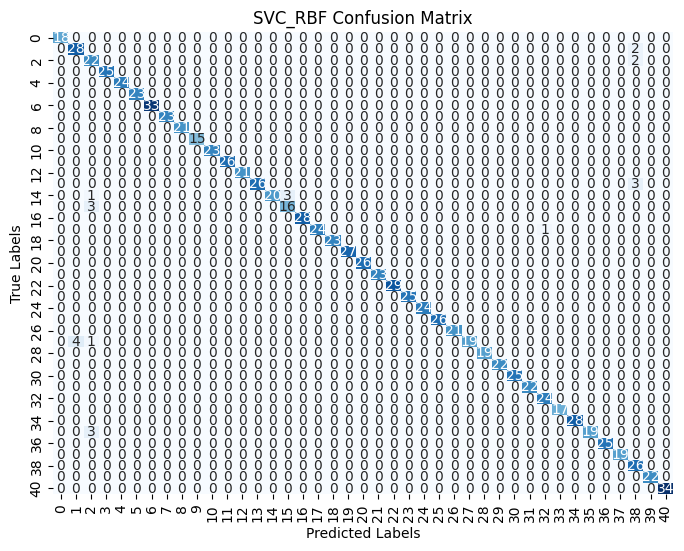

In [ ]:
# Loop through the models, train, test and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Test the model
    predictions = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))
     
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    print("\n" + "="*40 + "\n")

In [ ]:
## PCA feature extraction--------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
import numpy as np

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.5)  # Keep 95% of the variance
X_pca = pca.fit_transform(X)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Instantiate the SVC model
svc_model = SVC(kernel='linear')

# Train the model
svc_model.fit(X_train, y_train)

# Test the model
predictions = svc_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"SVC with PCA Accuracy: {accuracy}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(np.array2string(cm, separator=', '))


SVC with PCA Accuracy: 0.9745934959349594
Confusion Matrix:
[[16,  0,  0, ...,  0,  0,  0],
 [ 0, 28,  0, ...,  2,  0,  0],
 [ 0,  0, 22, ...,  2,  0,  0],
 ...,
 [ 0,  0,  0, ..., 26,  0,  0],
 [ 0,  0,  0, ...,  0, 22,  0],
 [ 0,  0,  0, ...,  0,  0, 34]]


## Single prediction

In [ ]:
# SVC
svc = SVC(kernel ='linear')
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test, ypred)

0.9745934959349594

In [ ]:
#save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [29]:
#Load Model
svc = pickle.load(open('svc_model.pkl','rb'))

In [30]:
#Test 1
print("predicted disease: ",svc.predict(X_test[20].reshape(1,-1)))
print("Actual Disease: ",y_test[20])


predicted disease:  [6]
Actual Disease:  6


In [ ]:
#test 2
print("predicted disease: ",svc.predict(X_test[100].reshape(1,-1)))
print("Actual Disease: ",y_test[100])

KeyError: 100

In [ ]:
y_test.isnull().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [ ]:
#test 3
print("predicted disease: ",svc.predict(X_test[40].reshape(1,-1)))
print("Actual Disease: ",y_test[40])

ValueError: X has 132 features, but SVC is expecting 8 features as input.

## Recommendation System and Prediction

In [ ]:
sys_des = pd.read_csv("E:\Programms\ML Project\medicine_recommendation_system\datasets\symptoms_df.csv")
precautions = pd.read_csv("E:\Programms\ML Project\medicine_recommendation_system\datasets\precautions_df.csv")
workout = pd.read_csv("E:\Programms\ML Project\medicine_recommendation_system\datasets\workout_df.csv")
description = pd.read_csv("E:\Programms\ML Project\medicine_recommendation_system\datasets\description.csv")
medications = pd.read_csv("E:\Programms\ML Project\medicine_recommendation_system\datasets\medications.csv")
diets = pd.read_csv("E:\Programms\ML Project\medicine_recommendation_system\datasets\diets.csv")


In [ ]:
#===========================================================================
# Custom and utility functions
#===========================================================================

def helper(dis):
  desc = description[description['Disease']== dis]['Description']
  desc = " ".join([w for w in desc])

  pre = precautions[precautions['Disease']==dis][['Precaution_1', 'Precaution_2','Precaution_3','Precaution_4']]
  pre = [col for col in pre.values]

  med = medications[medications['Disease']== dis]['Medication']
  med = [med for med in med.values]

  # med=''
  diet = diets[diets['Disease']== dis]['Diet']
  diet = [diet for diet in diet.values]

  wrkout = workout[workout['disease']==dis]['workout']

  return desc,pre,med,diet,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}


#Model Prediction Function
def get_predicted_value(patient_symptoms):
  input_vector = np.zeros(len(symptoms_dict))
  for item in patient_symptoms:
    input_vector[symptoms_dict[item]]=1
  return diseases_list[svc.predict([input_vector])[0]]

In [ ]:
# test 1
symptoms = input("Enter your symptoms....")
user_symptoms = [s.strip() for s in symptoms.split(',')]
user_symptoms = [sym.strip("[]' ") for sym in user_symptoms]
pred_disease = get_predicted_value(user_symptoms)
pred_disease

#calling helper function
desc,pre,med,diet,wrkout = helper(pred_disease)
print("desc: " , desc , "\npre:", pre, "\nmed:",med, "\ndies:", diet, "\nworkout:", wrkout)


KeyError: ''

In [ ]:
def helper2(dis):
    desc = description[description['Disease'] == dis]['Description'].values[0]

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values[0]

    med = medications[medications['Disease'] == dis]['Medication'].values.tolist()

    diet = diets[diets['Disease'] == dis]['Diet'].values.tolist()

    wrkout = workout[workout['disease'] == dis]['workout'].values.tolist()

    return desc, pre, med, diet, wrkout


In [ ]:
print(medications.columns)


Index(['Disease', 'Medication'], dtype='object')


In [ ]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, diet, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in diet:
    print(i, ": ", d_i)
    i += 1

=================predicted disease============
Urinary tract infection
=================description==================
Urinary tract infection is an infection in any part of the urinary system.
=================precautions==================
1 :  drink plenty of water
2 :  increase vitamin c intake
3 :  drink cranberry juice
4 :  take probiotics
=================medications==================
5 :  ['Antibiotics', 'Urinary analgesics', 'Phenazopyridine', 'Antispasmodics', 'Probiotics']
=================workout==================
6 :  Stay hydrated
7 :  Consume cranberry products
8 :  Include vitamin C-rich foods
9 :  Limit caffeine and alcohol
10 :  Consume probiotics
11 :  Avoid spicy and acidic foods
12 :  Consult a healthcare professional
13 :  Follow medical recommendations
14 :  Maintain good hygiene
15 :  Limit sugary foods and beverages
=================diets==================
16 :  ['UTI Diet', 'Hydration', 'Cranberry juice', 'Probiotics', 'Vitamin C-rich foods']


e:\Programms\ML Project\medicine_recommendation_system\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
import numpy as np

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Instantiate the SVC model
svc_model = SVC(kernel='linear')

# Train the model
svc_model.fit(X_train, y_train)

# Test the model
predictions = svc_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"SVC with PCA Accuracy: {accuracy}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(np.array2string(cm, separator=', '))
